In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from tools import local_max, line_intensity, extract_data

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
xValReal, yValReal = np.genfromtxt("/work/data/day_3/real_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)
xValFour, yValFour = np.genfromtxt("/work/data/day_3/fourier_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)

# know
# size of sensor = 5.9558 mm across
# number of pixels horizontaly is = 1440 px
# so mm/px = 5.95585/1440

mm_per_px = 5.95585/1440

print(mm_per_px)

0.004136006944444445


## Quantifying Uncertainty

(b) Standard Dev = 0.0319


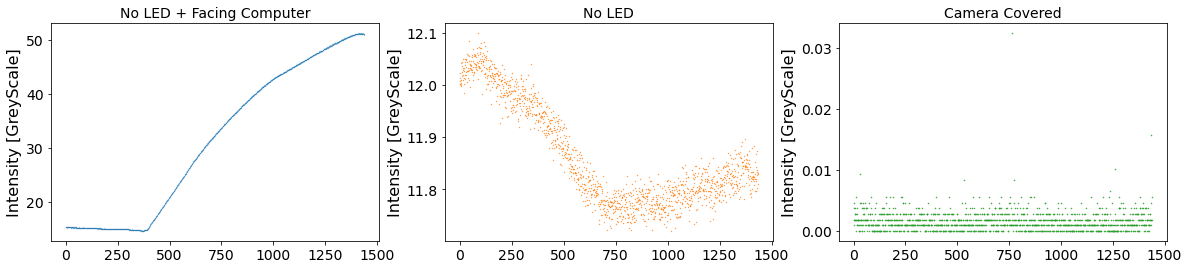

(c) Standard Dev = 0.0016


In [ ]:
gs = GridSpec(1,3,wspace = 0.2)
fig = plt.figure(figsize = (20,4))

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[0,2])

xVal, yVal = np.genfromtxt("/work/data/day_4/Computer_callibration.txt",skip_header = 1,delimiter = '\t',unpack = True)
ax1.plot(xVal,yVal,"C0.",markersize = 0.3)
ax1.set(label = "Pixels from Left", ylabel = "Intensity [GreyScale]", title = "No LED + Facing Computer")

xVal, yVal = np.genfromtxt("/work/data/day_4/LED_off_callibration.txt",skip_header = 1,delimiter = '\t',unpack = True)
ax2.plot(xVal,yVal,"C1.",markersize = 0.7)
ax2.set(label = "Pixels from Left", ylabel = "Intensity [GreyScale]", title = "No LED")

leftLim = 600
rightLim = 1500
sigma = np.std(yVal[np.logical_and(xVal > leftLim, xVal < rightLim)])
print(f"(b) Standard Dev = {sigma:.4f}")


xVal, yVal = np.genfromtxt("/work/data/day_4/Covered_callibration.txt",skip_header = 1,delimiter = '\t',unpack = True)
ax3.plot(xVal,yVal,"C2.",markersize = 1)
ax3.set(label = "Pixels from Left", ylabel = "Intensity [GreyScale]", title ="Camera Covered")
plt.savefig("notes/callibration/uncertaintyDerivation.pdf",dpi = 300)
plt.show()
sigma_0 = np.std(yVal)
print(f"(c) Standard Dev = {sigma_0:.4f}")

## Data Collection/Preparation and Ronchi Callibration

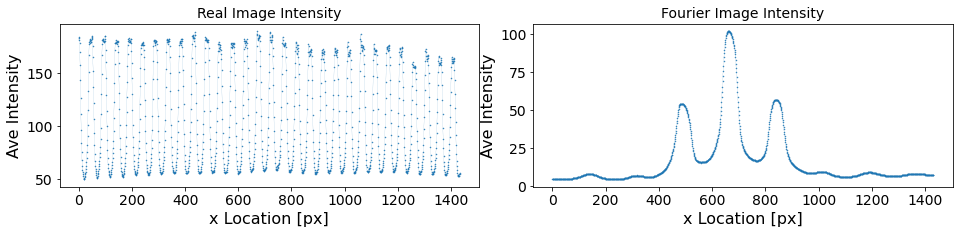

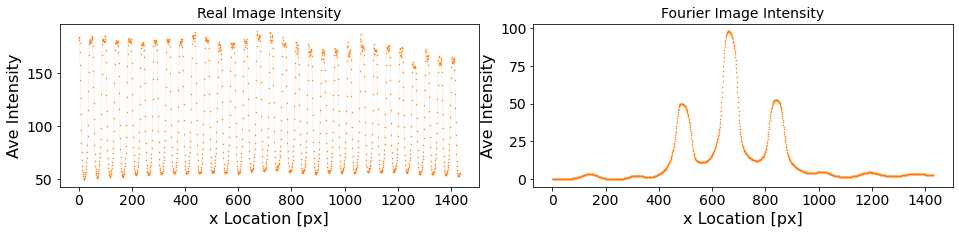

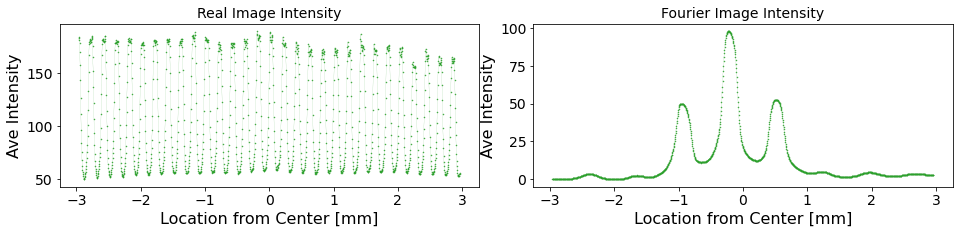

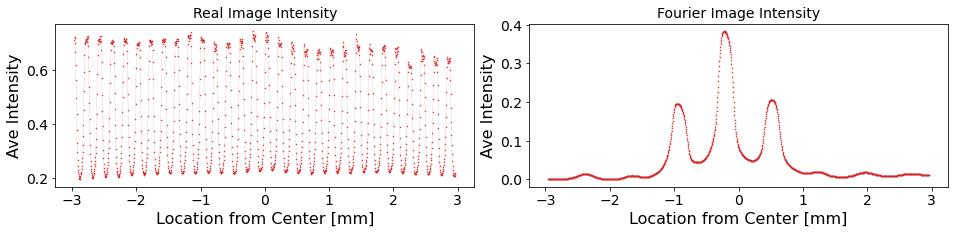

In [ ]:
xValReal, yValReal = np.genfromtxt("/work/data/day_3/real_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)
xValFour, yValFour = np.genfromtxt("/work/data/day_3/fourier_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)
width = 16
height = 3

# RAW DATA ############################################################################################

# Set up subplots
gs = GridSpec(1, 2,wspace=0.13)
fig = plt.figure(figsize = (width,height))
axReal = plt.subplot(gs[0,0])
axFour = plt.subplot(gs[0,1])
col = "C0"

axReal.plot(xValReal,yValReal,".-",color = col,markersize = 1,linewidth = 0.1)
axReal.set(xlabel = "x Location [px]", ylabel = "Ave Intensity", title = "Real Image Intensity")

axFour.plot(xValFour,yValFour,".-",color = col,markersize = 1,linewidth = 0.1)
axFour.set(xlabel = "x Location [px]", ylabel = "Ave Intensity", title = "Fourier Image Intensity")
#plt.savefig("notes/preliminary_ronchi/FourierIntensityProfile1.pdf",dpi=300)
plt.show()

# Mean Subtracted Data ############################################################################################
# Subrtract minimum y value to remove bulk of noise offset
xValReal -= np.min(xValReal)
fourierMin = np.min(yValFour)
yValFour -= fourierMin

# Set up subplots
gs = GridSpec(1, 2,wspace=0.13)
fig = plt.figure(figsize = (width,height))
axReal = plt.subplot(gs[0,0])
axFour = plt.subplot(gs[0,1])
col = "C1"

axReal.plot(xValReal,yValReal,".-",color = col,markersize = 1,linewidth = 0.1)
axReal.set(xlabel = "x Location [px]", ylabel = "Ave Intensity", title = "Real Image Intensity")

axFour.plot(xValFour,yValFour,".-",color = col,markersize = 1,linewidth = 0.1)
axFour.set(xlabel = "x Location [px]", ylabel = "Ave Intensity", title = "Fourier Image Intensity")
#plt.savefig("notes/preliminary_ronchi/FourierIntensityProfile1.pdf",dpi=300)
plt.show()

# In Sensor Position Space ############################################################################################
# Scale into units of mm
xValReal *= mm_per_px
xValFour *= mm_per_px
# Center x position on center of sensor at 0
xValReal -= np.max(xValReal)/2
xValFour -= np.max(xValFour)/2

# Set up subplots
gs = GridSpec(1, 2,wspace=0.13)
fig = plt.figure(figsize = (width,height))
axReal = plt.subplot(gs[0,0])
axFour = plt.subplot(gs[0,1])
col = "C2"

axReal.plot(xValReal,yValReal,".-",color = col,markersize = 1,linewidth = 0.1)
axReal.set(xlabel = "Location from Center [mm]", ylabel = "Ave Intensity", title = "Real Image Intensity")

axFour.plot(xValFour,yValFour,".-",color = col,markersize = 1,linewidth = 0.1)
axFour.set(xlabel = "Location from Center [mm]", ylabel = "Ave Intensity", title = "Fourier Image Intensity")
#plt.savefig("notes/preliminary_ronchi/FourierIntensityProfile1.pdf",dpi=300)
plt.show()

# Normalize ############################################################################################
yValReal /= 255
yValFour /= 255

# Set up subplots
gs = GridSpec(1, 2,wspace=0.13)
fig = plt.figure(figsize = (width,height))
axReal = plt.subplot(gs[0,0])
axFour = plt.subplot(gs[0,1])
col = "C3"

axReal.plot(xValReal,yValReal,".-",color = col,markersize = 1,linewidth = 0.1)
axReal.set(xlabel = "Location from Center [mm]", ylabel = "Ave Intensity", title = "Real Image Intensity")

axFour.plot(xValFour,yValFour,".-",color = col,markersize = 1,linewidth = 0.1)
axFour.set(xlabel = "Location from Center [mm]", ylabel = "Ave Intensity", title = "Fourier Image Intensity")
#plt.savefig("notes/preliminary_ronchi/FourierIntensityProfile1.pdf",dpi=300)
plt.show()

def prepData(xData, yData, norm = False, mm_per_px = 0.004136006944444445, rowsAveraged = 1000, center = False):

    # calculate error in y data
    GreyValMax = 255
    SensorWellMax = 15585 # according to http://softwareservices.flir.com/BFS-PGE-16S2/latest/EMVA/EMVA.html
    alpha_1 = np.sqrt( yData*GreyValMax/(SensorWellMax*rowsAveraged) ) # poisson statistics of pixels capturing N photons
    alpha_0 = np.ones(len(xData))*sigma                                # baseline dark + ambient uncertainty
    y_error = alpha_0 + alpha_1

    # Manipulate data into how we want it
    if center == False:
        x_out = (xData)*mm_per_px
    elif center == "abs":
        x_out = (xData-np.max(xData)/2)*mm_per_px
    elif center == "peak":
        x_out = (xData-xData[np.argmax(yData)])*mm_per_px
        
    y_out = yData-np.min(yData)

    # Normalize if applicable
    if norm == False:
        pass
    elif norm == 'abs': # in 8 bit
        y_out /= GreyValMax
    elif norm == 'axis': # on axis normalization
        y_out /= np.max(y_out)
    else:
        print("INVALID NORMALIZATION PARAMETER (0,abs,axis) - Did not normalize")

    return np.array([x_out,y_out,y_error])
    

1432
1432


<ErrorbarContainer object of 3 artists>

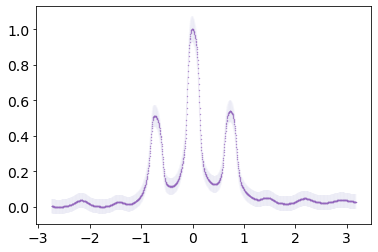

In [ ]:
xValFour, yValFour = np.genfromtxt("/work/data/day_3/fourier_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)
x, y, err = prepData(xValFour, yValFour,norm = 'axis',center = 'peak')


print(len(x))
print(len(y))

plt.errorbar(x,y,yerr = err,fmt = "C4.-",markersize = 0.7,linewidth = 0.1,elinewidth = 0.02)

## Callibration 1 - Real image edges

Real Image Callibration
a = 0.201 +/- 0.007 [mm]
b = 0.100 +/- 0.004 [mm]


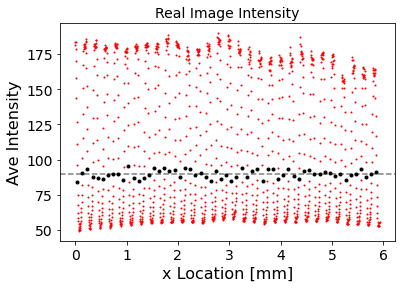

In [ ]:
xValReal, yValReal = np.genfromtxt("/work/data/day_3/real_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)
# Callibration via real image  ####################################################################################################

interceptAxis = 90

realCallibrationArray = -np.abs(yValReal-interceptAxis)
real_mids,real_mids_idx = local_max(realCallibrationArray,N=20)

a = 2*np.average(np.diff(xValReal[real_mids_idx]*mm_per_px))
a_err = np.std(np.diff(xValReal[real_mids_idx]*mm_per_px))*2
b = a/2
b_err = a_err/2

print("Real Image Callibration")
print(f"a = {a:.3f} +/- {a_err:.3f} [mm]")
print(f"b = {b:.3f} +/- {b_err:.3f} [mm]")

plt.plot(xValReal*mm_per_px,yValReal,"r.",markersize = 2)
plt.axhline(interceptAxis,linestyle = 'dashed',color = "Grey")
plt.plot(xValReal[real_mids_idx]*mm_per_px,yValReal[real_mids_idx],'k.')

plt.xlabel("x Location [mm]")
plt.ylabel("Ave Intensity")
plt.title("Real Image Intensity")
plt.show()

## Callibration 2 - Fourier image scale '$k_a$ space'  to match peaks

RAW PEAK AMPLITUDE
F_-3.0	= 7.772
F_-2.0	= 6.798
F_-1.0	= 54.212
F_0.0	= 101.919
F_1.0	= 56.850
F_2.0	= 9.258
F_3.0	= 8.854
F_4.0	= 7.965
[56.8498, 9.2575, 8.8545, 7.9646]
[54.2118, 6.7976, 7.7724, 0]
[55.5308, 8.02755, 8.31345, 3.9823]


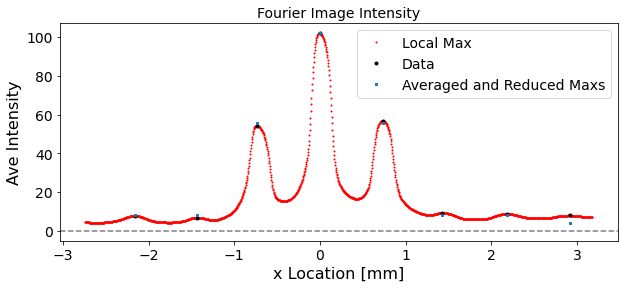


Average Distance Between Peaks	= 0.724 +/- 0.021 [mm]
/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


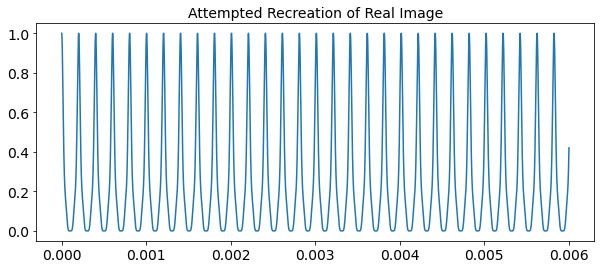

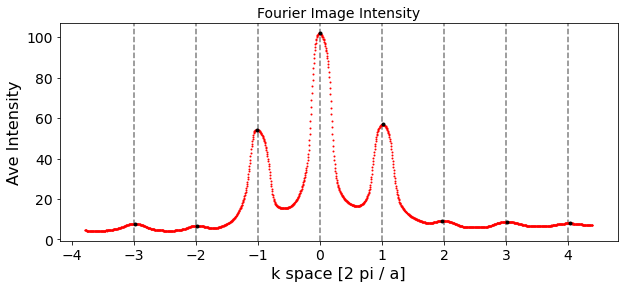

Average K_a Between Peaks	= 1.000 +/- 0.029 [2 pi / a]	 < This should be 1 if we set a correctly

[0.99954192 0.96527213 1.01667681 1.01667681 0.95384886 1.04523495
 1.00525355]


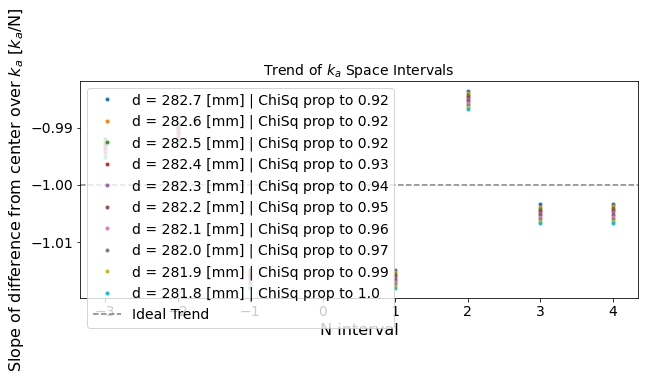

In [ ]:
# Plot the fourier image in k_a space and scale the k_a axis by varying K until it lines up with  intiger tics
# find fourier peaks and center images  ############################################################################################
fourierPeaks, fourierPeaks_idx = local_max(yValFour,N=80)
x_center = xValFour[fourierPeaks_idx[fourierPeaks == np.max(fourierPeaks)]]*mm_per_px


centre = (len(fourierPeaks))/2-1
pArray = []
nArray = []
t0 = 0
print("RAW PEAK AMPLITUDE")
for _, coef in enumerate(fourierPeaks):
    if _-centre < 0:
        nArray.append(coef)
    if _-centre > 0:
        pArray.append(coef)
    if _-centre == 0:
        t0 = coef
    print(f"F_{_-centre}\t= {coef:.3f}")

nArray = nArray[::-1]
pArray = pArray[::1]
nArray.append(0)

print(pArray)
print(nArray)

tArray = []
for p,n in zip(pArray,nArray):
    tArray.append(np.mean([p,n])-0*8.02755)

print(tArray)

fig = plt.figure(figsize = (10,4))
plt.plot(xValFour*mm_per_px-x_center,yValFour,'r.',markersize = 2,label = "Local Max")
plt.plot(xValFour[fourierPeaks_idx]*mm_per_px-x_center,fourierPeaks,'k.',label= "Data")
leveledPeaks = np.concatenate((tArray[2::-1],np.array([t0]),tArray))
plt.axhline(0,linestyle = "dashed",color = "Grey")
plt.plot(xValFour[fourierPeaks_idx]*mm_per_px-x_center,leveledPeaks,'s',label = "Averaged and Reduced Maxs",markersize = 2)
plt.xlabel("x Location [mm]")
plt.ylabel("Ave Intensity")
plt.title("Fourier Image Intensity")
plt.legend()
plt.savefig("/work/notes/callibration/callibration_fA_xspace.pdf",dpi = 300)
plt.show()


distBetweenPeaks = np.diff(xValFour[fourierPeaks_idx]*mm_per_px)
print(f"\nAverage Distance Between Peaks\t= {np.mean(distBetweenPeaks):.3f} +/- {np.std(distBetweenPeaks):.3f} [mm]")

def FourrierFunc_Intensity(x,a,t0,posArray,negArray):
    k = 2*np.pi/a
    outArray = []
    enumArrayP = np.arange(1,len(posArray)+1)
    enumArrayN = np.arange(1,len(negArray)+1)
    for x_val in x:
        positives = np.sum( posArray * np.exp( (-1j*(enumArrayP)*k*x_val) ) )
        negatives = np.sum( negArray * np.exp( ( 1j*(enumArrayN)*k*x_val) ) )
        total = t0 + positives + negatives
        
        outArray.append(total*np.conjugate(total))
    return np.array(outArray)

a_val = (a)*10**(-3)
fig = plt.figure(figsize = (10,4))
xspace_temp = np.linspace(0,6,5000)*10**(-3)
yspace_temp = FourrierFunc_Intensity(xspace_temp,a_val,t0,tArray,tArray)
yspace_temp /= np.max(yspace_temp)
plt.plot(xspace_temp,yspace_temp)
plt.title("Attempted Recreation of Real Image")
plt.show()

# Now do it in k space #############################################################################################################
def xspace_to_kspace(x_space,a,d,wavelength = 515*10**(-9)):
    return (a/wavelength)*np.sin(np.arctan(x_space/d))

aperture_image_dist = (282.2)*10**(-3)
a_val = (0.2007)*10**(-3)

fig = plt.figure(figsize = (10,4))
k_space = xspace_to_kspace((xValFour*mm_per_px-x_center)*10**(-3),a_val,aperture_image_dist)
for _ in range(8):
    plt.axvline(_-3,linestyle = "dashed",color = "Grey")
plt.plot(k_space,yValFour,'r.',markersize = 2)
plt.plot(k_space[fourierPeaks_idx],fourierPeaks,'k.')
plt.xlabel("k space [2 pi / a]")
plt.ylabel("Ave Intensity")
plt.title("Fourier Image Intensity")
plt.savefig("/work/notes/callibration_fA_kspace.pdf",dpi = 300)
plt.show()

distBetweenPeaks_in_k = xspace_to_kspace(distBetweenPeaks*10**(-3),a_val,aperture_image_dist)#*(2*np.pi)
print(f"Average K_a Between Peaks\t= {np.mean(distBetweenPeaks_in_k):.3f} +/- {np.std(distBetweenPeaks_in_k):.3f} [2 pi / a]\t < This should be 1 if we set a correctly")
print()
print(distBetweenPeaks_in_k)

xaxis = np.arange(-3,5,1) #np.arange(0,1,1/len(distBetweenPeaks_in_k))
fig = plt.figure(figsize = (10,4))

distances = aperture_image_dist - np.arange(-0.5,0.5,0.1)*10**(-3)
for dist in distances:
    k_space = xspace_to_kspace((xValFour*mm_per_px-x_center)*10**(-3),a_val,dist)
    yspace = -np.abs(k_space[fourierPeaks_idx][xaxis != 0])/np.abs(xaxis[xaxis != 0])
    res = yspace + 1
    chiSquared = np.sum(res**2)
    plt.plot(xaxis[xaxis != 0],yspace,'.',label = f"d = {np.around(dist*1000,1)} [mm] | ChiSq prop to {np.around(chiSquared*1000,2)}");
plt.axhline(-1,linestyle = 'dashed',color = "Grey",label = "Ideal Trend");
plt.title(r"Trend of $k_a$ Space Intervals")
plt.xlabel("N interval")
plt.ylabel(r"Slope of difference from center over $k_a$ [$k_a$/N]")
plt.legend()
plt.show()

# Plot the resultant k space separation 
"""
a_to_test = ( 0.2 + np.linspace(-0.03,0.03,100) )*10**(-3)
for a_val in a_to_test:
    k_space = xspace_to_kspace(distBetweenPeaks*10**(-3),a_val,aperture_image_dist)
    print(k_space)
    distBetweenPeaks_in_k     = np.mean(k_space)
    distBetweenPeaks_in_k_err =  np.std(k_space)
    plt.errorbar(a_val,distBetweenPeaks_in_k,yerr = distBetweenPeaks_in_k_err)
plt.show()""";


## Callibration 3 - Fit model fourier series to fourier space

Best Fit Parameters
 a_opt = 0.00025057 +/- 6.73e-06
 D_opt = 0.35172222 +/- 0.00943874
 O_opt = 1.034e-05 +/- 1.3e-07
 H_opt = 0.07286597 +/- 0.00261299
 S_opt = 1.02252071 +/- 0.56017435

Fit Statistics
 ChiSq = 15308.257639266236 +/- 53.422841556772326
 nu = 1427
 Reduced Chi = 10.72758068624123


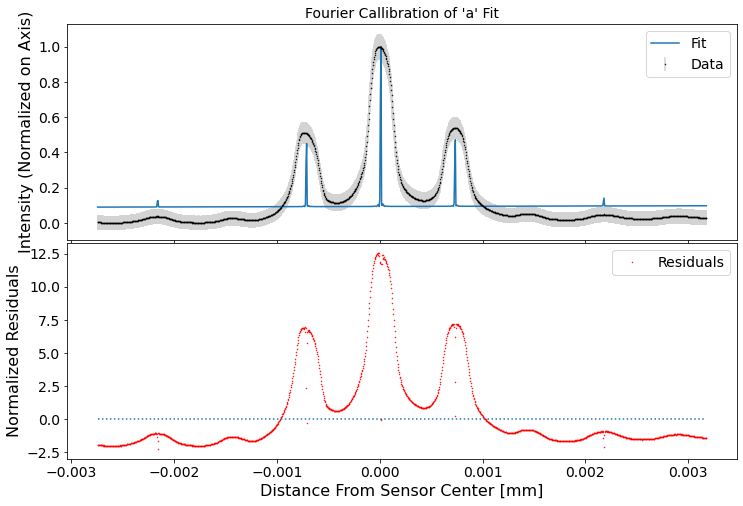

[2.50567509e-04 3.51722219e-01 1.03413199e-05 7.28659736e-02
 1.02252071e+00]


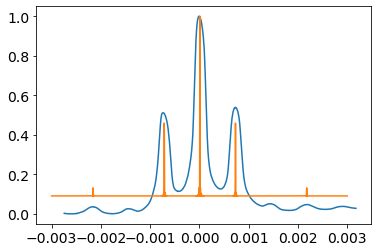

In [ ]:
xValReal, yValReal = np.genfromtxt("/work/data/day_3/real_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)
xValFour, yValFour = np.genfromtxt("/work/data/day_3/fourier_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)
xdat, ydat, alpha = prepData(xValFour, yValFour,norm = "axis",center = 'peak')
# this is the x data in mm, the y data in on axis normalized intensity centered at 0, and quantified error

xdat /= 1000 # send to m

# Write out a fxn to fit in lab
# This combines eqn 10.35 with our knowledge of the geometry to plot according to position on the sensor
def fourierSpaceCallibrationModel(x, a, D, O = 0, H = 0, slope = 0, N = 95, wavelength = 515*10**(-9)):
    b = a/2
    theta = np.arctan((x-O)/D)
    beta = np.pi*b/(wavelength)*np.sin(theta)
    alpha = np.pi*a/(wavelength)*np.sin(theta)
    relativeIntensity = ((np.sin(beta)/beta)**2)*((np.sin(N*alpha)/np.sin(alpha))**2)/N**2
    intensity = relativeIntensity + H + slope*x
    intensity /= np.max(intensity)
    return intensity

# Define labels for plotting later
xtitle = "Distance From Sensor Center [mm]"
ytitle = "Intensity (Normalized on Axis)"
figtitle = "Fourier Callibration of 'a' Fit"
width = 16
height = 3
# Set up subplots
gs = GridSpec(2, 1,hspace=0.015)
fig = plt.figure(figsize = (12,8))
axF = plt.subplot(gs[0,0])
axR = plt.subplot(gs[1,0],sharex=axF)

# initial parameter guesses from inspection of intercept and slope
a_init = 0.201 *10**(-3)
D_init = 282 *10**(-3)
# these three as just to reduce some unideal behaviour of data collection
offset_init = 0.00001
height_init = 0.1
slope_init = 0.0001
# Set realistic bounds
param_bounds=([0.05*10**(-3),200*10**(-3),-1,0,-np.inf],[0.5 *10**(-3),5000 *10**(-3),1,0.2,np.inf])

# Model space
x = np.linspace(-3,3,10000)*10**(-3)
y = fourierSpaceCallibrationModel(x,a_init,D_init,offset_init,height_init,slope_init)

# Performe curve fit
pOpt, pCov = curve_fit(fourierSpaceCallibrationModel, xdat, ydat,   #p0opt = optimized values of fitting paramters, pCov = covariance matrix
                       p0=[a_init,D_init,offset_init,height_init,slope_init],
                       bounds = param_bounds,
                       sigma=alpha,
                       absolute_sigma=True)
a_opt = pOpt[0]
D_opt = pOpt[1]
O_opt = pOpt[2]
H_opt = pOpt[3]
S_opt = pOpt[4]
alpha_vec = np.sqrt(np.diag(pCov))
alpha_a_opt = alpha_vec[0]
alpha_D_opt = alpha_vec[1]
alpha_O_opt = alpha_vec[2]
alpha_H_opt = alpha_vec[3]
alpha_S_opt = alpha_vec[4]

# Print best fit parameters
dec = 8 # set resolution of output rounding
print("Best Fit Parameters\n a_opt =",np.around(a_opt,dec),"+/-",np.around(alpha_a_opt,dec))
print(" D_opt =",np.around(D_opt,dec),"+/-",np.around(alpha_D_opt,dec))
print(" O_opt =",np.around(O_opt,dec),"+/-",np.around(alpha_O_opt,dec))
print(" H_opt =",np.around(H_opt,dec),"+/-",np.around(alpha_H_opt,dec))
print(" S_opt =",np.around(S_opt,dec),"+/-",np.around(alpha_S_opt,dec))

# Calculate Residuals
res = ydat - fourierSpaceCallibrationModel(xdat,*pOpt)
normRes = res/alpha

# Calculate Chi squared statistics
N = len(xdat)
chiSq = np.sum(normRes**2)
nu = N  - len(pOpt) # points minus #fit parameters
chiSigma = np.sqrt(2*nu)
print("\nFit Statistics\n ChiSq =",chiSq,"+/-",chiSigma)
print(" nu =",nu)
print(" Reduced Chi =",chiSq/nu)

# Caluclate model output over the same range as out data
model = np.linspace(np.min(xdat),np.max(xdat),1000)
model_ydat = fourierSpaceCallibrationModel(model,*pOpt)

# Plot data with best fit
axF.errorbar(xdat,ydat,yerr = alpha,fmt = 'k.',label = "Data",ecolor = "LightGrey",markersize = 1);
axF.plot(model,model_ydat,label = "Fit");
axF.legend()
axF.set(ylabel = ytitle, title = figtitle);

# Plot Residuals
axR.plot(xdat,normRes,'r.',markersize = 1,label = "Residuals");
axR.hlines(0,np.min(xdat),np.max(xdat),linestyles = "dotted")
axR.set(xlabel = xtitle, ylabel = "Normalized Residuals")
axR.legend()

plt.setp(axF.get_xticklabels(), visible=False)

plt.savefig("/work/notes/callibration/callibration_fB.pdf",dpi = 300)
plt.show()

plt.plot(xdat,ydat)
plt.plot(x,y)
print(pOpt)

# Fit Calibration

[ 1.01297365e-04 -7.56971231e-01]


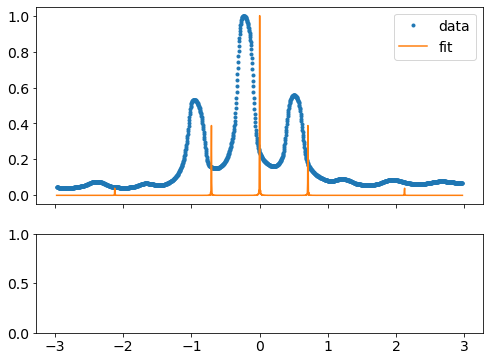

In [ ]:
def FSCM(x, a, D, N = 95, wavelength = 515*10**(-9)):
    b = a/2
    theta = np.arctan((x)/D)
    
    beta = np.pi*b/(wavelength)*np.sin(theta)
    alpha = np.pi*a/(wavelength)*np.sin(theta)
    
    #divide by zero is causing issues so replace zero with 1e-12
    beta = np.where(beta == 0, [1e-12], beta) 
    alpha = np.where(alpha == 0, [1e-12], alpha)


    relativeIntensity = ((np.sin(beta)/beta)**2)*((np.sin(N*alpha)/np.sin(alpha))**2)/N**2
    
    intensity = relativeIntensity 
    intensity /= np.max(intensity)
    
    return intensity


data = extract_data('/work/images/day_3/fourier_calibration.png', mm_per_px)

fig, (ax1,ax2) = plt.subplots(2,1, figsize = (8,6), gridspec_kw={'height_ratios': (2,1)}, sharex = True)


#fit doesn't work really so not using rn
pOpt, pCov = curve_fit(FSCM, data.x, data.norm_profile, p0 = [0.2e-3, 283e-3], sigma = data.err, absolute_sigma=True)
print(pOpt)

# print(FSCM(data.x,*[0.2e-3, 282e-3]))

ax1.plot(data.x, data.norm_profile,'.', label = 'data')

ax1.plot(data.x, FSCM(data.x/1000, 0.2e-3, 275e-3), label = 'fit')
ax1.legend()




[ 53.59537037 175.49351852]
[ 11.85277778 176.33796296]
Extracted Wavelength = 0.2009 +/- 0.013 [mm]
Extracted Frequency  = 4.9976 +/- 0.325 [1/mm]


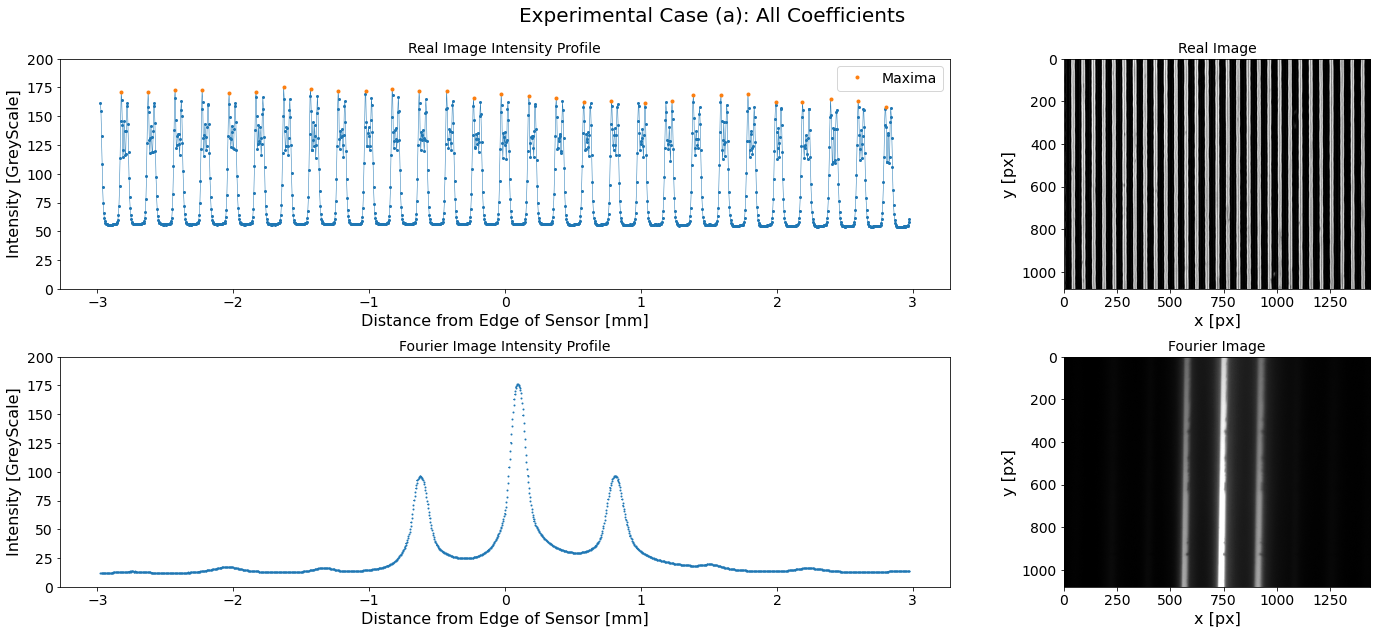

In [ ]:
fourFile = '/work/images/day_4/four_a.tiff'
realFile = '/work/images/day_4/real_a.tiff'
titleName = 'Experimental Case (a): All Coefficients'
figFileName = "/work/notes/experimental_sf/case_a_plot.pdf"


def doMyWorkForMe(realFile,fourFile,titleName,figFileName,conversion = 0.004136006944444445,minBool = True,N = 50):
    four = extract_data(fourFile, conversion = conversion)
    real = extract_data(realFile, conversion = conversion)

    fig, axs = plt.subplots(2,2, figsize = (20,9), gridspec_kw={'width_ratios': [5, 2.25]})

    ax1 = axs[0][0]
    ax2 = axs[1][0]
    ax3 = axs[0][1]
    ax4 = axs[1][1]

    ax1.errorbar(real.x,real.profile,yerr = real.err,fmt='C0.-',linewidth = 0.5,markersize = 4)
    ax1.set(xlabel = 'Distance from Edge of Sensor [mm]', ylabel = 'Intensity [GreyScale]',ylim = (0,200),title = "Real Image Intensity Profile");

    ax2.errorbar(four.x, four.profile,yerr = four.err,fmt =  '.', label = 'Fourier Image Data',markersize = 2)
    ax2.set(xlabel = 'Distance from Edge of Sensor [mm]', ylabel = 'Intensity [GreyScale]',ylim = (0,200),title = "Fourier Image Intensity Profile");

    # plot images right

    imgF = mpimg.imread(fourFile)
    imgR = mpimg.imread(realFile)
    clim = np.array([np.min(real.profile), np.max(real.profile)])
    
    print(clim)
    colmap = "gray"
    ax3.imshow(imgR,cmap=colmap, interpolation = 'sinc', vmin = clim[0], vmax = clim[1])
    ax3.set(xlabel = 'x [px]', ylabel = 'y [px]',title = "Real Image");

    clim = np.array([np.min(four.profile), np.max(four.profile)])
    
    print(clim)
    colmap = "gray"
    ax4.imshow(imgF,cmap = colmap, interpolation = 'sinc', vmin = clim[0], vmax = clim[1])
    ax4.set(xlabel = 'x [px]', ylabel = 'y [px]',title = "Fourier Image");


    fig.tight_layout()

    # NEEDS TO BE WORKED ON TO PROPERLY EXTRACT FOR EACH TEST CASE!
    if minBool == "nope":
        maxs, indexes = local_max(-real.profile, N = N)
        # dont plot
    elif minBool:
        maxs, indexes = local_max(-real.profile, N = N)
        ax1.plot(real.x[indexes], -maxs, 'C1.',label = "Minima", zorder = 5)
        ax1.legend()
    else:
        maxs, indexes = local_max(real.profile, N = N)
        ax1.plot(real.x[indexes], maxs, 'C1.', label = 'Maxima', zorder = 5)
        ax1.legend()
    fig.subplots_adjust(top=0.9)
    fig.suptitle(titleName)

    wavelength = real.x[indexes][1:] - real.x[indexes][:-1]
    freq = 1/wavelength

    plt.savefig(figFileName,dpi = 300)

    print(f"Extracted Wavelength = {np.mean(wavelength):.4f} +/- {np.std(wavelength):.3f} [mm]")
    print(f"Extracted Frequency  = {np.mean(1/wavelength):.4f} +/- {np.std(1/wavelength):.3f} [1/mm]")

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = False)

# b)

[55.83333333 60.48796296]
[ 13.51388889 139.32037037]
Extracted Wavelength = 0.5159 +/- 0.170 [mm]
Extracted Frequency  = 2.2371 +/- 1.010 [1/mm]


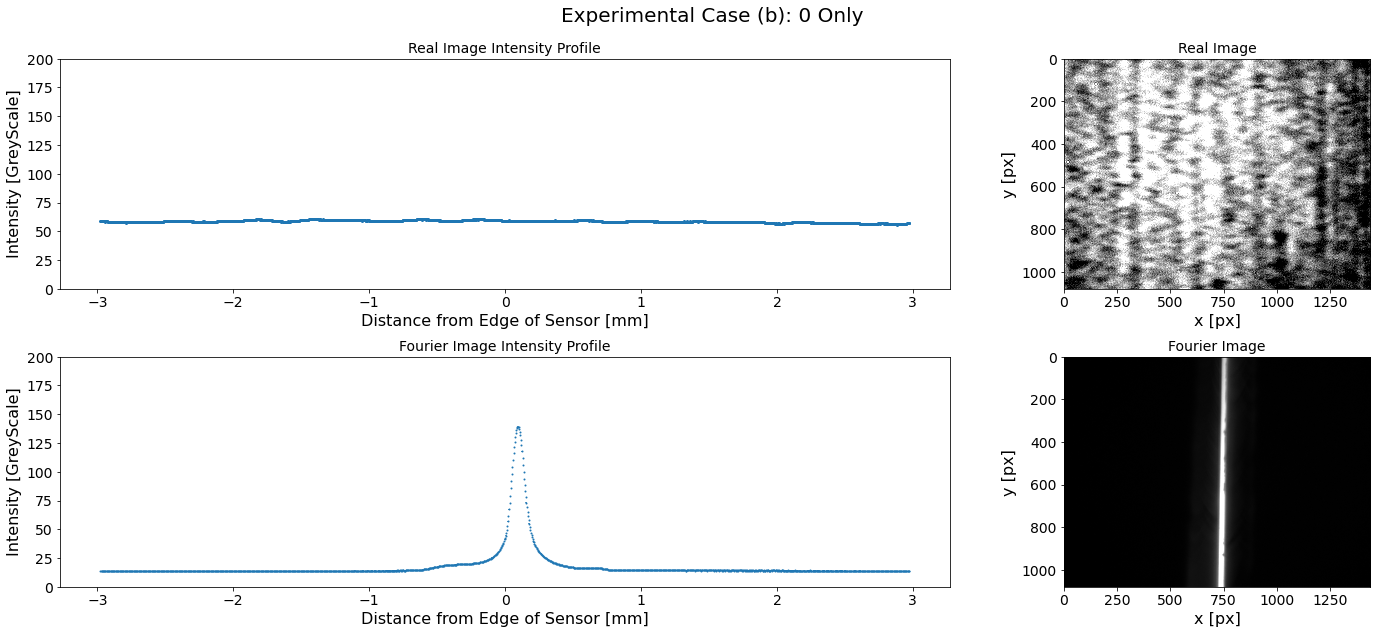

In [ ]:
fourFile = '/work/images/day_5/Four_b.tiff'
realFile = '/work/images/day_5/Real_b.tiff'
titleName = 'Experimental Case (b): 0 Only'
figFileName = "/work/notes/experimental_sf/case_b_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = "nope")

# c)

[65.44351852 69.80462963]
[19.11111111 81.41759259]
Extracted Wavelength = 0.3579 +/- 0.168 [mm]
Extracted Frequency  = 3.4055 +/- 1.518 [1/mm]


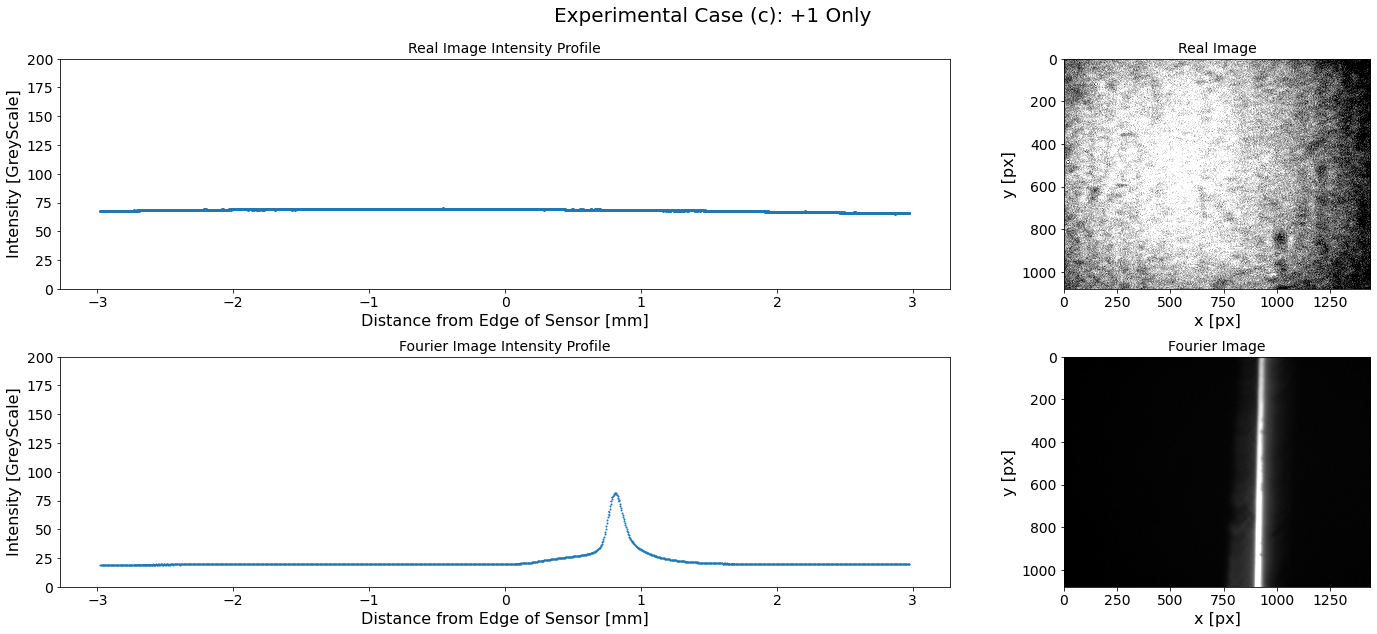

In [ ]:
fourFile = '/work/images/day_5/Four_c.tiff'
realFile = '/work/images/day_5/Real_c.tiff'
titleName = 'Experimental Case (c): +1 Only'
figFileName = "/work/notes/experimental_sf/case_c_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = "nope")

# d)

[44.89351852 62.38888889]
[ 12.6537037  134.56296296]
Extracted Wavelength = 0.2007 +/- 0.006 [mm]
Extracted Frequency  = 4.9873 +/- 0.140 [1/mm]


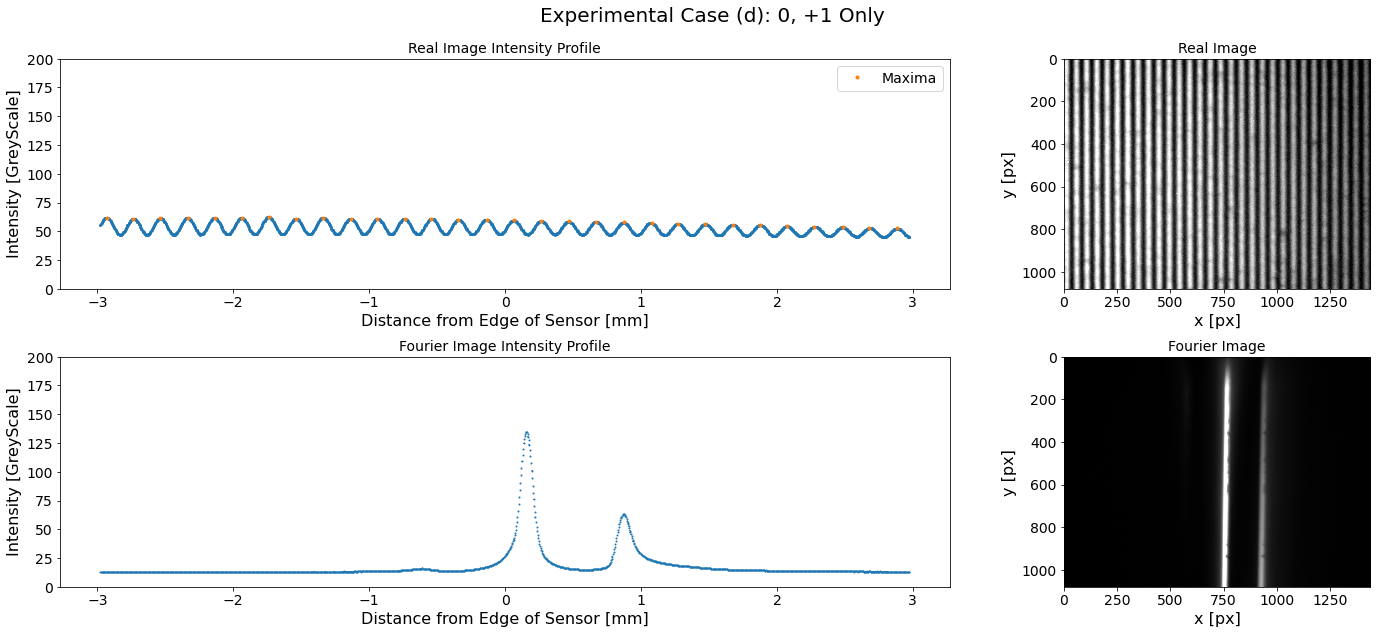

In [ ]:
fourFile = '/work/images/day_5/Four_d.tiff'
realFile = '/work/images/day_5/Real_d.tiff'
titleName = 'Experimental Case (d): 0, +1 Only'
figFileName = "/work/notes/experimental_sf/case_d_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = False)

# e)

[ 48.0712963  123.68240741]
[ 16.76759259 160.95833333]
Extracted Wavelength = 0.2006 +/- 0.002 [mm]
Extracted Frequency  = 4.9858 +/- 0.058 [1/mm]


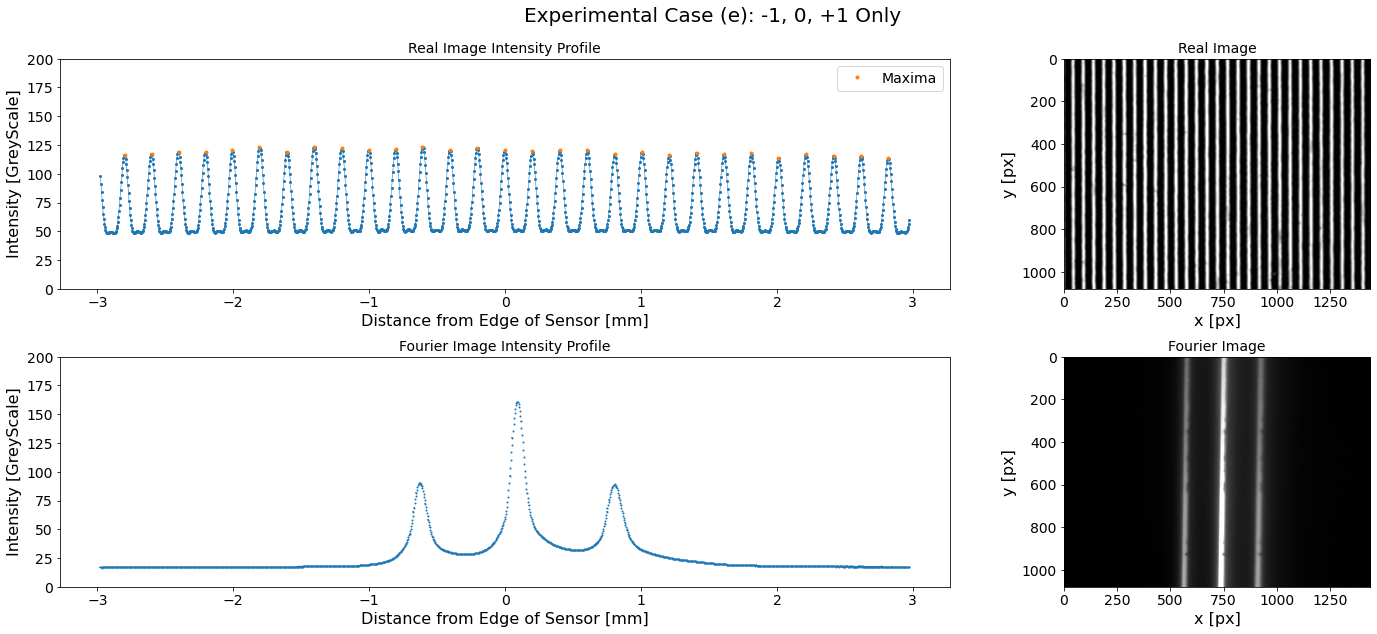

In [ ]:
fourFile = '/work/images/day_4/four_e.tiff'
realFile = '/work/images/day_4/real_e.tiff'
titleName = 'Experimental Case (e): -1, 0, +1 Only'
figFileName = "/work/notes/experimental_sf/case_e_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = False)

# Mask part f)

[45.20925926 73.56851852]
[12.99537037 85.67222222]
Extracted Wavelength = 0.1003 +/- 0.003 [mm]
Extracted Frequency  = 9.9735 +/- 0.259 [1/mm]


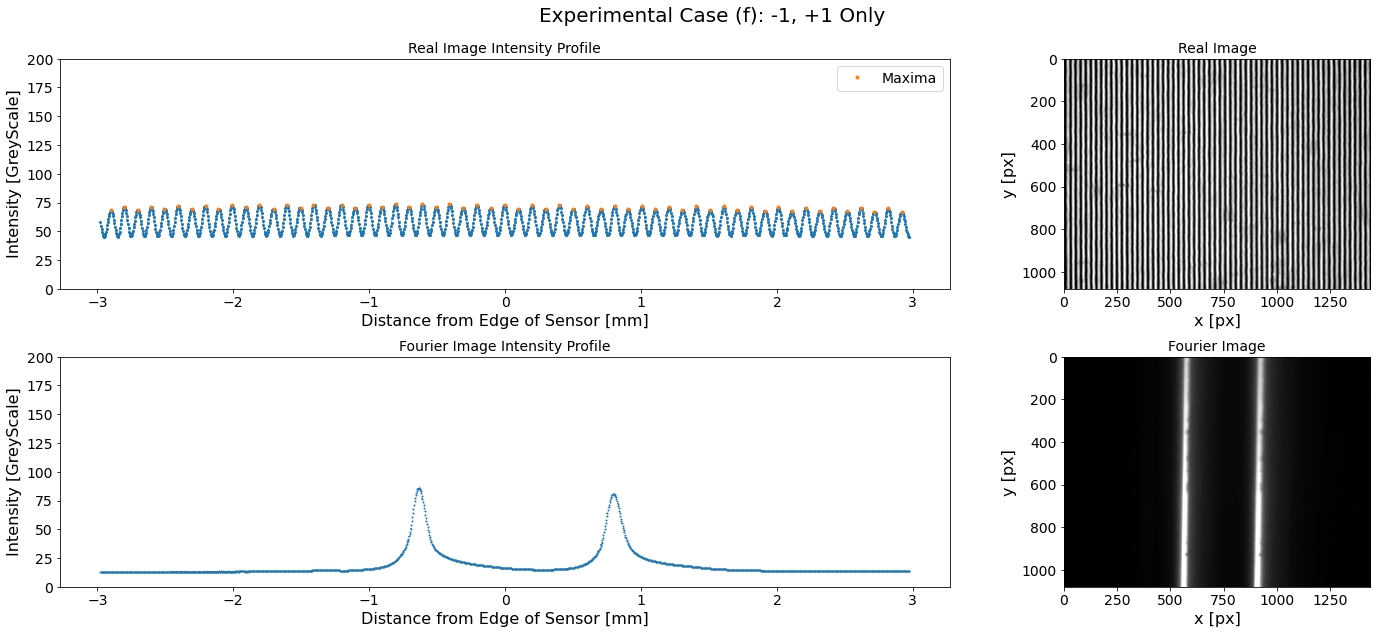

In [ ]:
fourFile = '/work/images/day_4/four_f.tiff'
realFile = '/work/images/day_4/real_f.tiff'
titleName = 'Experimental Case (f): -1, +1 Only'
figFileName = "/work/notes/experimental_sf/case_f_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = False,N = 30)

# h)

[46.97222222 70.97222222]
[15.32407407 85.19166667]
Extracted Wavelength = 0.2008 +/- 0.003 [mm]
Extracted Frequency  = 4.9811 +/- 0.079 [1/mm]


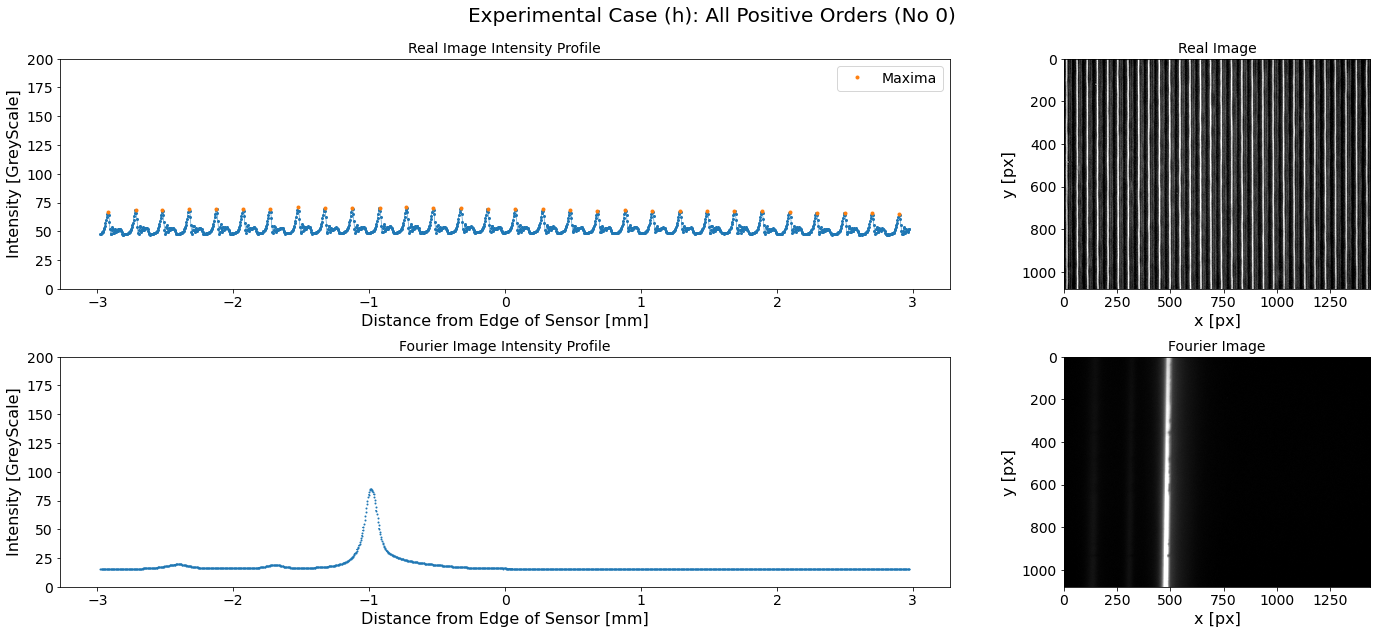

In [ ]:
fourFile = '/work/images/day_5/Four_h.tiff'
realFile = '/work/images/day_5/Real_h.tiff'
titleName = 'Experimental Case (h): All Positive Orders (No 0)'
figFileName = "/work/notes/experimental_sf/case_h_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = False)

# i)

[ 44.99259259 109.13333333]
[ 14.13148148 150.08518519]
Extracted Wavelength = 0.2007 +/- 0.004 [mm]
Extracted Frequency  = 4.9851 +/- 0.092 [1/mm]


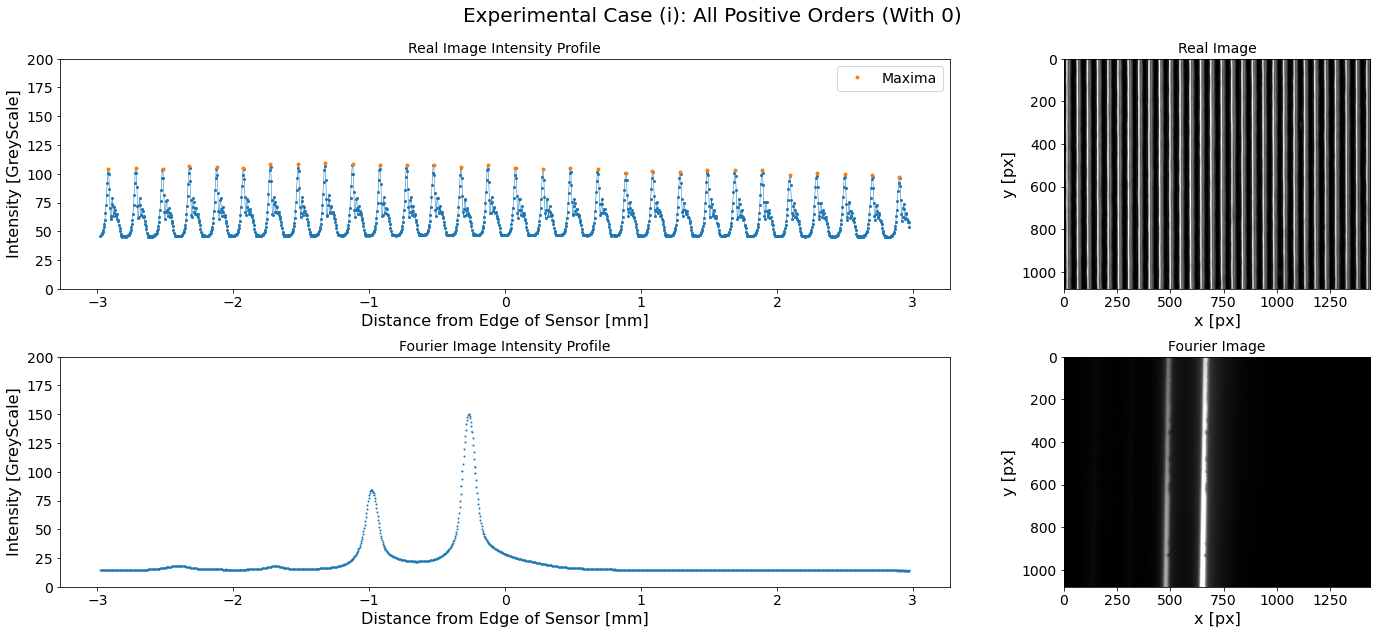

In [ ]:
fourFile = '/work/images/day_5/Four_i.tiff'
realFile = '/work/images/day_5/Real_i.tiff'
titleName = 'Experimental Case (i): All Positive Orders (With 0)'
figFileName = "/work/notes/experimental_sf/case_i_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = False)

# j)

[ 50.42314815 103.78240741]
[16.50648148 84.6       ]
Extracted Wavelength = 0.2005 +/- 0.002 [mm]
Extracted Frequency  = 4.9874 +/- 0.051 [1/mm]


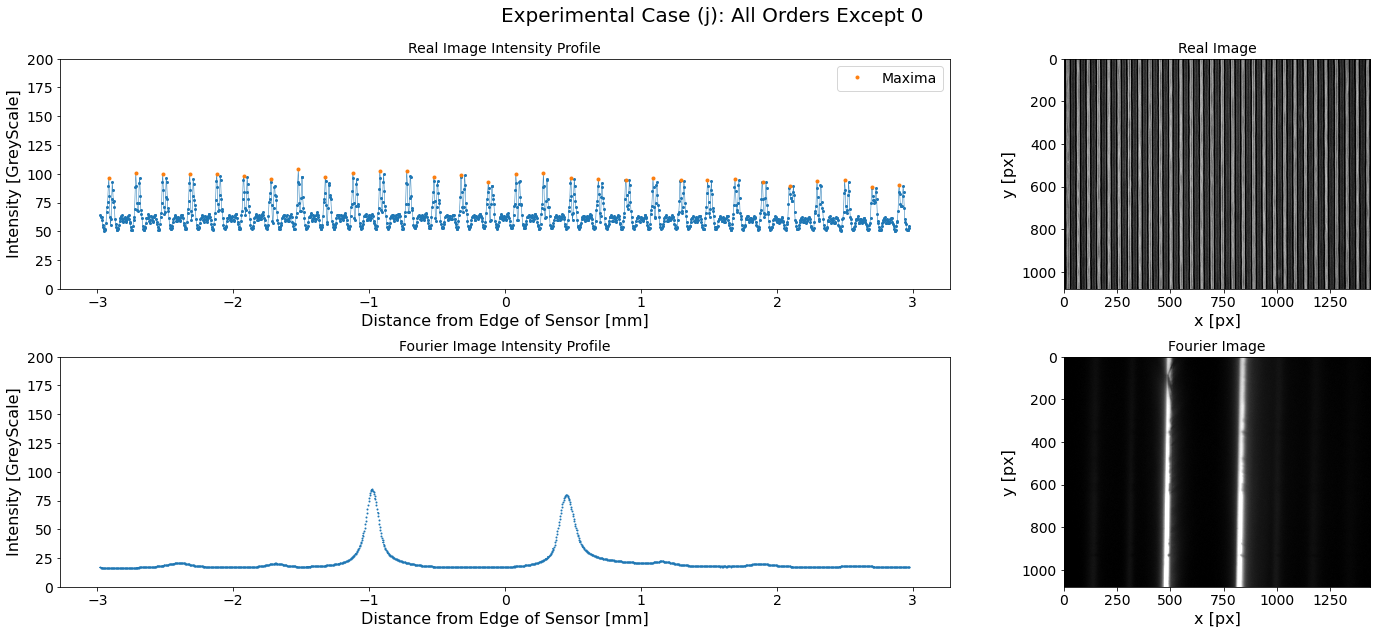

In [ ]:
fourFile = '/work/images/day_5/Four_j.tiff'
realFile = '/work/images/day_5/Real_j.tiff'
titleName = 'Experimental Case (j): All Orders Except 0'
figFileName = "/work/notes/experimental_sf/case_j_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = False)

# Mask Part k)

[ 47.33888889 127.34351852]
[ 15.89074074 151.15462963]
Extracted Wavelength = 0.2007 +/- 0.003 [mm]
Extracted Frequency  = 4.9843 +/- 0.069 [1/mm]


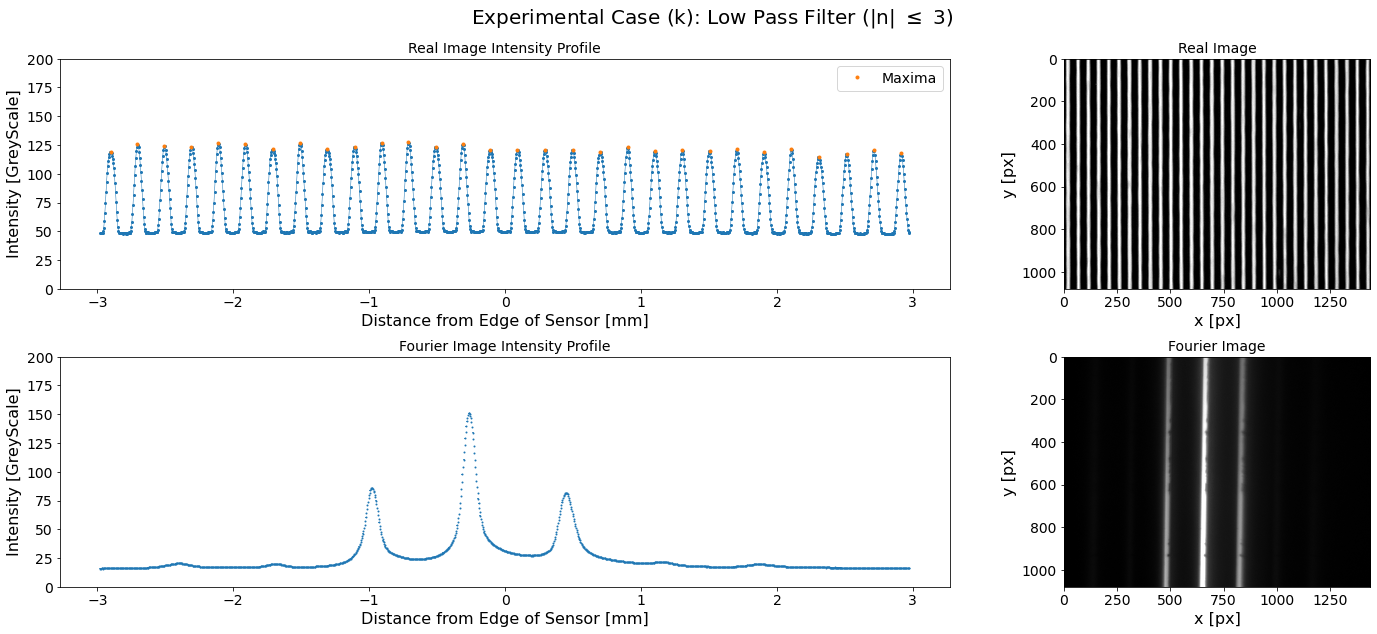

In [ ]:
fourFile = '/work/images/day_5/Four_k.tiff'
realFile = '/work/images/day_5/Real_k.tiff'
titleName = r'Experimental Case (k): Low Pass Filter (|n| $\leq$ 3)'
figFileName = "/work/notes/experimental_sf/case_k_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = False)

# Mask Part l)

[46.84166667 59.05555556]
[13.50925926 15.1037037 ]
Extracted Wavelength = 0.2007 +/- 0.003 [mm]
Extracted Frequency  = 4.9845 +/- 0.075 [1/mm]


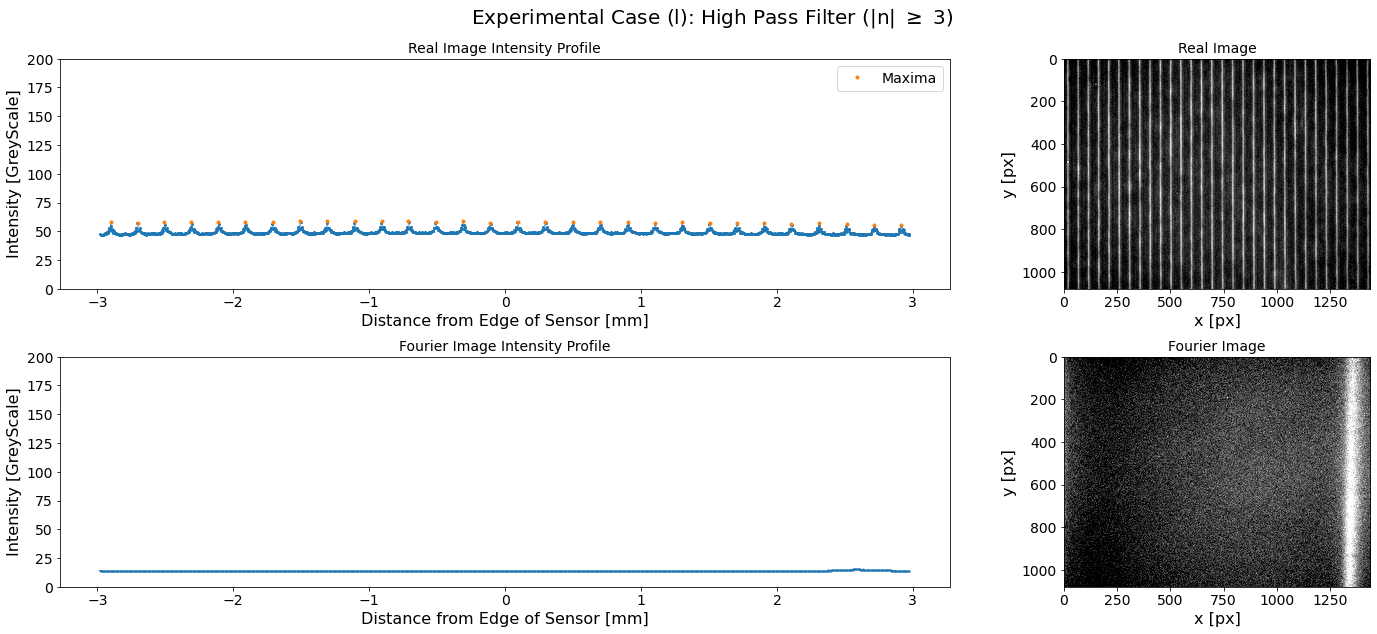

In [ ]:
fourFile = '/work/images/day_5/Four_l.tiff'
realFile = '/work/images/day_5/Real_l.tiff'
titleName = r'Experimental Case (l): High Pass Filter (|n| $\geq$ 3)'
figFileName = "/work/notes/experimental_sf/case_l_plot.pdf"

doMyWorkForMe(realFile,fourFile,titleName,figFileName,minBool = False)

# light uneveness

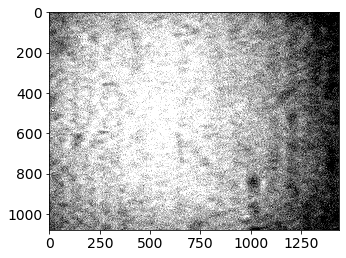

In [ ]:
realFile = '/work/images/day_5/Real_c.tiff'
saveName = "/work/notes/uneven_light.pdf"

real = extract_data(realFile, mm_per_px)
img = plt.imread(realFile)
plt.imshow(img, cmap='gray', interpolation='sinc', vmin = np.min(real.profile), vmax = np.max(real.profile), )
plt.savefig(saveName)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d5fa1824-1bb4-43c9-8e7a-6904bae8e065' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>